In [1]:
library(PerformanceAnalytics)

ERROR: Error in library(PerformanceAnalytics): there is no package called 'PerformanceAnalytics'


In [2]:
library(readxl)

In [68]:
## Hypothesis for an linear regression - Quiz 5

## Volume = β0 + β1 (Income) + ε

# β0: Purchase volume when the Income = 0, since this value of Income is well outside the 
# range of values (minimum Income = $12,000), β0 has no interpretation in the problem context.

# β1: The increase in mean monthly purchase volume (in $s) for every $1 increase in family 
# income for the population of Moose customers.

# B1 is unknown so I do not know what this is, there's no epilson on a fitted line

In [69]:
## Fit the model to the data, identifying the fitted model.

# Volume = 36.537 + 0.00218 (Income)

# > linefitQ5 <- lm(Volume ~ Income) 
# > summary(linefitQ5)
# Coefficients: 
#                          Estimate        Std. Error        t value         Pr(>|t|)    
# (Intercept)       36.536631      25.997684      1.405         0.1769 
# Income            0.002178         0.001199      1.817         0.0859

In [70]:
## R2  = .155;  15.5% of the variation in monthly purchase volume in the sample can be accounted for 
# by the linear relationship with family income.

# > summary(linefitQ5)$r.squared 
# [1] 0.1549827

In [71]:
## s = 31.56; this is our estimate of the standard deviation of the error term ε, it is the standard deviation of 
# the points around the fitted regression line, a measure of the variation in monthly purchase volume that is 
# not captured by the linear relationship with family income.

# > summary(linefitQ5)$sigma 
# [1] 31.55788

In [72]:
# DO NOT USE
# It is 85% certain that this range of values contains the true mean of B1.
# There is a 8.5 out of 10 chance that B1 is present in the above interval.
# There is an 85% chance that the true B1 will be captured by a sample within the range [0000 - 0000]

# USE
# We are 85% confident that this process will generate an interval containing the true value of B1.
# 85% of the time this procedure will give us an interval that contains the parameter of B1.

In [73]:
# 85% CI = (0.000376, 0.00398).  There is a 85% probability of getting an interval that contains the true slope 
#(β1 as defined in Question 1) describing the linear relationship between monthly purchase volume and family 
# income as specified by the given model.

# > confint(linefitQ5, level = .85) 
 #                 7.5 %              92.5 %
# (Intercept)     -2.5562848432    75.629547567
# Income           0.0003755216      0.003980772

In [74]:
# H0: β1 = 0; there is no linear relationship between monthly purchase volume and family income

# HA: β1 ≠ 0; there is a linear relationship between monthly purchase volume and family income

# p-value = .0859; There is an 8.6% chance of getting this sample result if in fact there were no linear 
#relationship between monthly purchase volume and family income.  You would only conclude a linear relationship 
# if the acceptable level of error in drawing this conclusion is greater than 0.0859.

# > summary(linefitQ5)
# Coefficients: 
#                          Estimate                 Std. Error         t value         Pr(>|t|)    
# (Intercept)       36.536631           25.997684        1.405           0.1769 
# Income              0.002178             0.001199          1.817           0.0859

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [75]:
# this is the model we're trying to fit
# a) y = B0 + B1(LS) + B2(HS) + B3(Age) + B4(Rooms) + B5(Baths) + B6(Garage) + E

# b) p-value: 2.576e-08
    # r2: Multiple R-squared:  0.8472
# H0 for p-value: All B1 = B2 = B6 = 0; no relationship
# Ha for p-value: There is a relationship w/ at least 1
# interpretation: the probability of obtaining this model if there was no relationship between any of the variables
# 85% of the variation in the appraised values of the houses is caused by the predictor variables 

# c. 95% C.I. for B1 = [124.86432506 - 459.5043570]

# We are 95% confident that this process will generate an interval containing the true value of B1, the estimate of how much 
# appraised value changes based on the house's lot size

# d.anova output
# p = .007667 (this is a sequential test, relationship of Value and Age holding LotSize and HouseSize fixed)
# H0: There is no relationship between Value & Age
# Ha: There is a relationship between Value & Age

# p = .03269 (there is relationship of Value and Age, holding all others fixed beyond others)

# Residual standard error: 52.84

# e. Relationship between Baths and Appraised Value
# p-value = holding all others fixed .00523, Baths - Appraised Values PERIOD. 
# p-value (holding .73707

#f H0: There is no relationship between the number of baths and a house's appraised value
    # Ha: There is a relationship between the number of baths and a house's appraised value

In [76]:
# LotSize    1.183e-07 relationship of Value and LotSize
# HouseSize  7.839e-08 relationship of Value and HouseSize holding LotSize fixed
# Age        0.007667 relationship of Value and Age, holding LotSize and HouseSize fixed
# Rooms      0.232825 relationship of Value and Rooms, holding LotSize, HouseSize, and Age fixed
# Baths      0.628486    
# Garage     0.350359

In [3]:
houses <- read_excel("Values.xlsx", na = "NA", col_names = TRUE)

attach(houses)

In [4]:
linefitHouses <- lm(AppraisedValue ~ LotSize + HouseSize + Age + Rooms + Baths + Garage)

In [5]:
summary(linefitHouses)


Call:
lm(formula = AppraisedValue ~ LotSize + HouseSize + Age + Rooms + 
    Baths + Garage)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.793  -29.668    0.199   35.731  100.207 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  83.06381   68.78871   1.208  0.23950   
LotSize     292.18434   80.88338   3.612  0.00146 **
HouseSize     0.10058    0.02796   3.597  0.00152 **
Age          -1.25349    0.55150  -2.273  0.03269 * 
Rooms        10.68976    7.54185   1.417  0.16977   
Baths         6.27865   18.47597   0.340  0.73707   
Garage       15.97114   16.75384   0.953  0.35036   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.84 on 23 degrees of freedom
Multiple R-squared:  0.8472,	Adjusted R-squared:  0.8074 
F-statistic: 21.26 on 6 and 23 DF,  p-value: 2.576e-08


In [6]:
confint(linefitHouses, level = .95)

,2.5 %,97.5 %
(Intercept),-59.23647111,225.3640888
LotSize,124.86432506,459.5043570
HouseSize,0.04273679,0.1584248
Age,-2.39435315,-0.1126329
Rooms,-4.91173374,26.2912606
Baths,-31.94180328,44.4991111
Garage,-18.68681193,50.6290935


In [7]:
print(anova(linefitHouses))

Analysis of Variance Table

Response: AppraisedValue
          Df Sum Sq Mean Sq F value    Pr(>F)    
LotSize    1 158435  158435 56.7543 1.183e-07 ***
HouseSize  1 166428  166428 59.6178 7.839e-08 ***
Age        1  23836   23836  8.5387  0.007667 ** 
Rooms      1   4192    4192  1.5016  0.232825    
Baths      1    671     671  0.2405  0.628486    
Garage     1   2537    2537  0.9087  0.350359    
Residuals 23  64206    2792                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [8]:
linefitHousesr <- lm(AppraisedValue ~ Garage + Baths + Rooms + Age + HouseSize + LotSize)
summary(linefitHousesr)


Call:
lm(formula = AppraisedValue ~ Garage + Baths + Rooms + Age + 
    HouseSize + LotSize)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.793  -29.668    0.199   35.731  100.207 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  83.06381   68.78871   1.208  0.23950   
Garage       15.97114   16.75384   0.953  0.35036   
Baths         6.27865   18.47597   0.340  0.73707   
Rooms        10.68976    7.54185   1.417  0.16977   
Age          -1.25349    0.55150  -2.273  0.03269 * 
HouseSize     0.10058    0.02796   3.597  0.00152 **
LotSize     292.18434   80.88338   3.612  0.00146 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.84 on 23 degrees of freedom
Multiple R-squared:  0.8472,	Adjusted R-squared:  0.8074 
F-statistic: 21.26 on 6 and 23 DF,  p-value: 2.576e-08


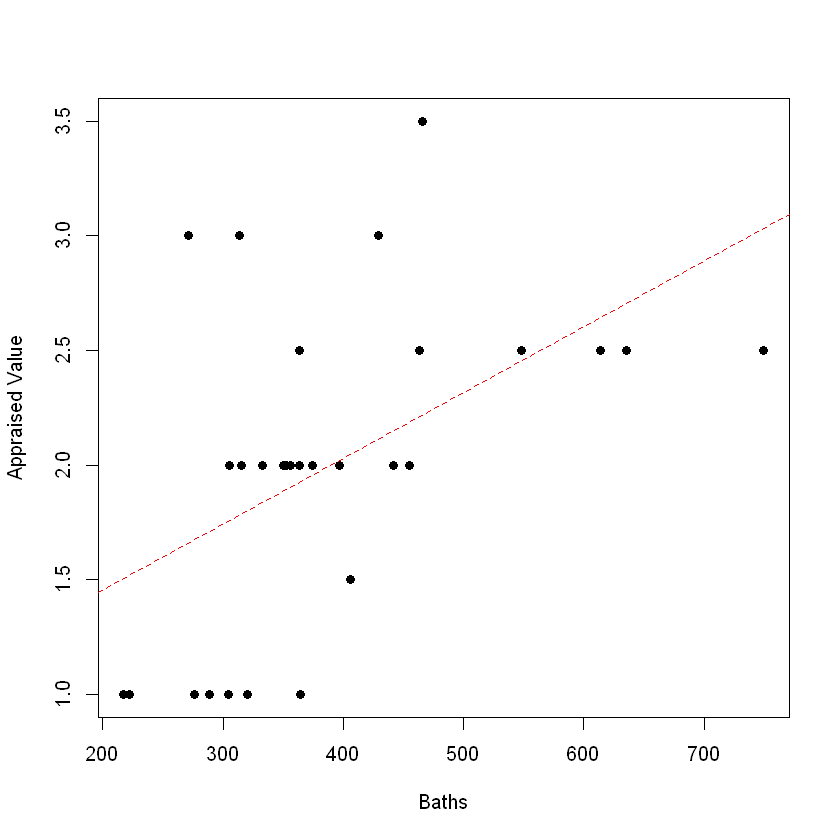

In [9]:
## this is basura

plot(AppraisedValue, Baths, pch = 16 ,  xlab = "Baths",  ylab = "Appraised Value")
abline(lm(Baths ~ AppraisedValue), lty=2,  col= 'red')

In [10]:
linefitbath <- lm(AppraisedValue ~ Baths)
summary(linefitbath)


Call:
lm(formula = AppraisedValue ~ Baths)

Residuals:
    Min      1Q  Median      3Q     Max 
-204.22  -56.00  -21.05   46.49  316.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   217.71      60.06   3.625  0.00114 **
Baths          86.07      28.42   3.029  0.00523 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 106.3 on 28 degrees of freedom
Multiple R-squared:  0.2468,	Adjusted R-squared:  0.2198 
F-statistic: 9.172 on 1 and 28 DF,  p-value: 0.005233


In [11]:
cor(houses[,3:8])

,LotSize,HouseSize,Age,Rooms,Baths,Garage
LotSize,1.00000000,0.4177096,-0.20264831,0.06618112,0.09200025,0.27196859
HouseSize,0.41770962,1.0000000,-0.41040532,0.39957251,0.52131437,0.57134322
Age,-0.20264831,-0.4104053,1.00000000,-0.00858975,-0.51086188,-0.53206415
Rooms,0.06618112,0.3995725,-0.00858975,1.00000000,0.13345696,0.02879164
Baths,0.09200025,0.5213144,-0.51086188,0.13345696,1.00000000,0.49311367
Garage,0.27196859,0.5713432,-0.53206415,0.02879164,0.49311367,1.00000000


In [86]:
# The more correlated they (if they are above .7, i cannot throw them out)
# I can't hold them fixed if there is too much colinearity and it affects my ability to make an accurate prediction
# As I move one unit of HouseSize, the other factors will move as well
# I have high colinearity in things in my model, then I want to remove them to make sure they are not
# interefering with my model
# |.7| is garbage, toss it from the model

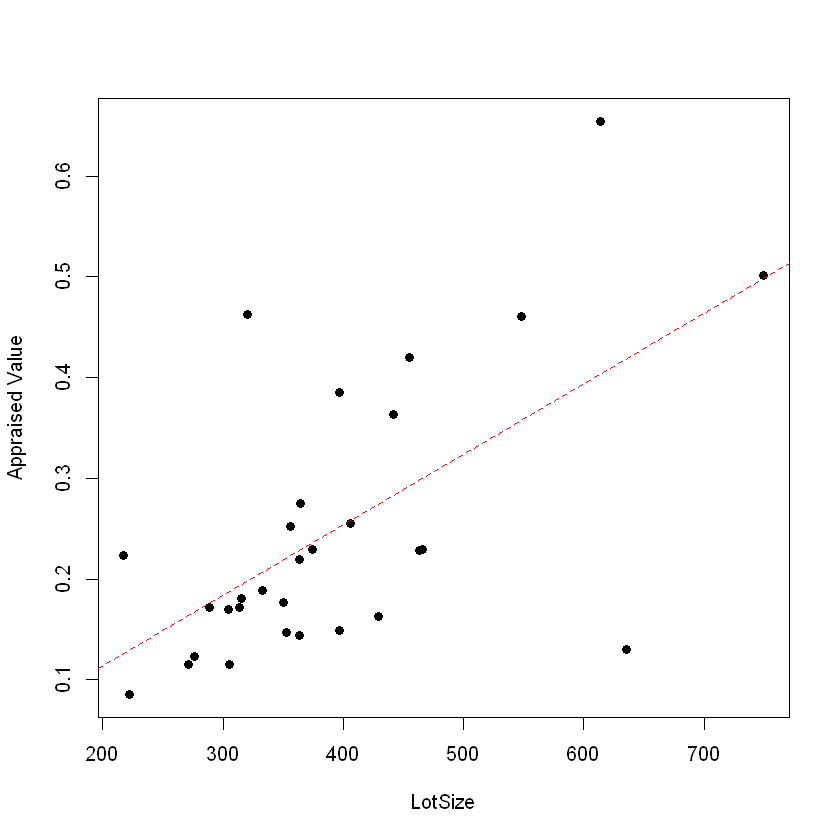

In [12]:
plot(AppraisedValue, LotSize, pch = 16 ,  xlab = "LotSize",  ylab = "Appraised Value")
abline(lm(LotSize ~ AppraisedValue), lty=2,  col= 'red')

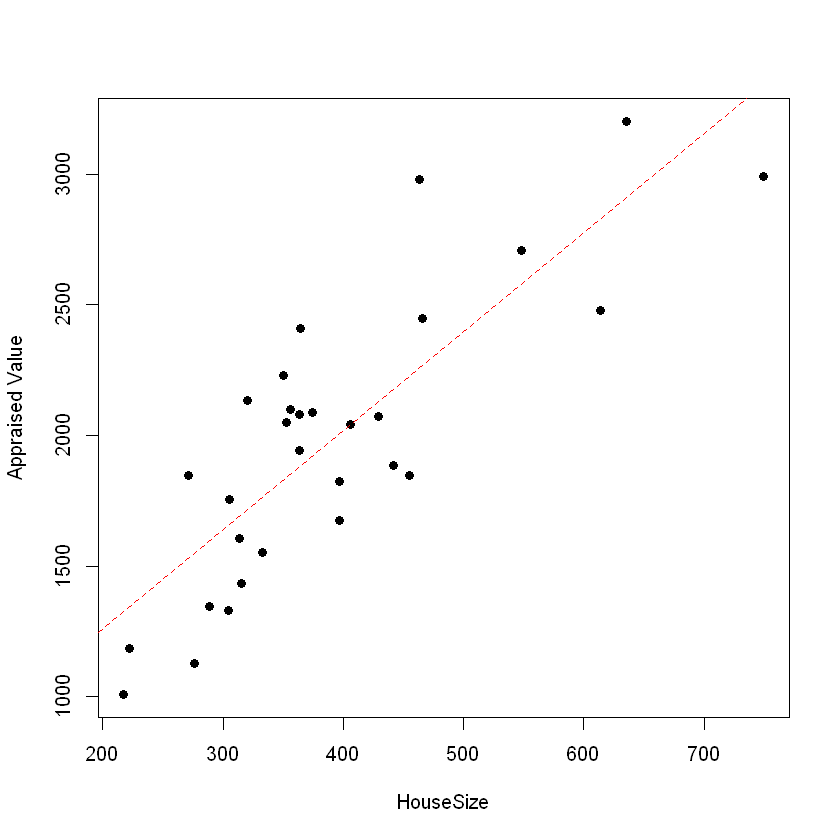

In [13]:
plot(AppraisedValue, HouseSize, pch = 16 ,  xlab = "HouseSize",  ylab = "Appraised Value")
abline(lm(HouseSize ~ AppraisedValue), lty=2,  col= 'red')

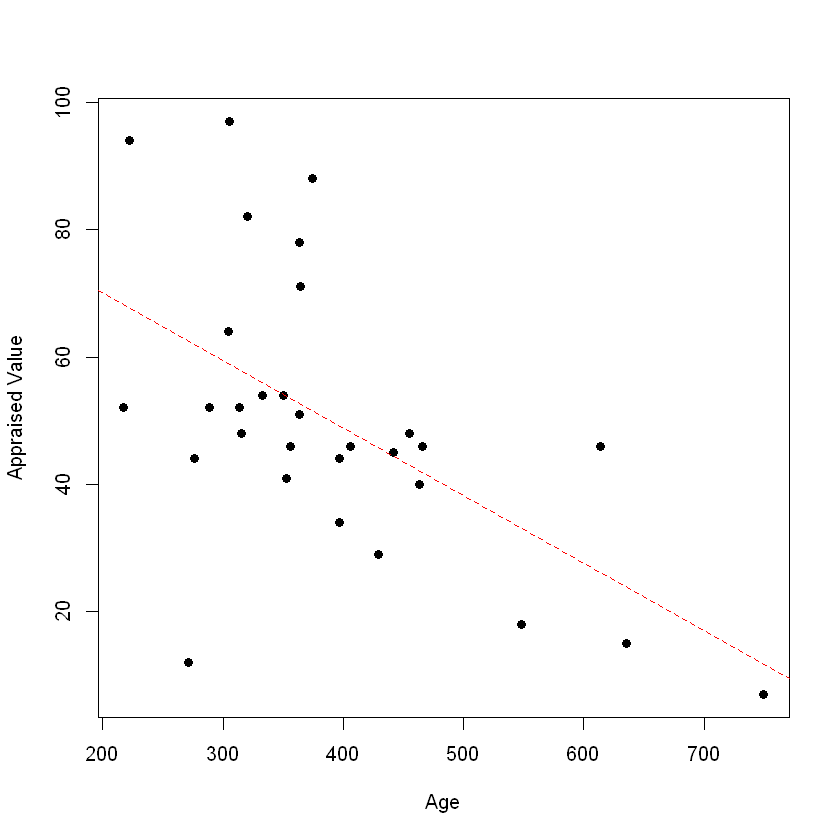

In [14]:
plot(AppraisedValue, Age, pch = 16 ,  xlab = "Age",  ylab = "Appraised Value")
abline(lm(Age ~ AppraisedValue), lty=2,  col= 'red')

In [15]:
linefit3 <- lm(AppraisedValue ~ LotSize + HouseSize + Age + Rooms + Garage)
summary(linefit3)


Call:
lm(formula = AppraisedValue ~ LotSize + HouseSize + Age + Rooms + 
    Garage)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.320  -30.285    2.373   37.549   99.067 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  93.5166    60.3841   1.549 0.134542    
LotSize     286.7124    77.7901   3.686 0.001161 ** 
HouseSize     0.1036     0.0260   3.985 0.000547 ***
Age          -1.3123     0.5139  -2.554 0.017422 *  
Rooms        10.6438     7.4004   1.438 0.163269    
Garage       16.8365    16.2512   1.036 0.310521    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.85 on 24 degrees of freedom
Multiple R-squared:  0.8465,	Adjusted R-squared:  0.8145 
F-statistic: 26.46 on 5 and 24 DF,  p-value: 4.946e-09


In [91]:
# use step wise regression
# maximize R2
# minimize S - remove variance in the model
# good residuals - they don't violate residuals assumptions
# logical relationships

In [16]:
linefit3 <- lm(AppraisedValue ~ LotSize + HouseSize + Age + Rooms)
summary(linefit3)


Call:
lm(formula = AppraisedValue ~ LotSize + HouseSize + Age + Rooms)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.587  -41.783    1.241   35.946   84.754 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 102.95667   59.78017   1.722  0.09737 .  
LotSize     287.35749   77.90157   3.689  0.00110 ** 
HouseSize     0.11607    0.02309   5.027 3.48e-05 ***
Age          -1.50801    0.47859  -3.151  0.00419 ** 
Rooms         9.03443    7.24610   1.247  0.22403    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.93 on 25 degrees of freedom
Multiple R-squared:  0.8396,	Adjusted R-squared:  0.8139 
F-statistic: 32.72 on 4 and 25 DF,  p-value: 1.335e-09


In [17]:
linefit3 <- lm(AppraisedValue ~ LotSize + HouseSize + Age)
summary(linefit3)


Call:
lm(formula = AppraisedValue ~ LotSize + HouseSize + Age)

Residuals:
    Min      1Q  Median      3Q     Max 
-117.80  -36.08   12.82   30.57   98.98 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 136.79404   53.82964   2.541  0.01735 *  
LotSize     276.08764   78.19613   3.531  0.00157 ** 
HouseSize     0.12882    0.02092   6.157 1.65e-06 ***
Age          -1.39893    0.47552  -2.942  0.00677 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.48 on 26 degrees of freedom
Multiple R-squared:  0.8296,	Adjusted R-squared:   0.81 
F-statistic:  42.2 on 3 and 26 DF,  p-value: 3.911e-10


In [18]:
linefit3 <- lm(AppraisedValue ~ LotSize + HouseSize)
summary(linefit3)


Call:
lm(formula = AppraisedValue ~ LotSize + HouseSize)

Residuals:
     Min       1Q   Median       3Q      Max 
-154.626  -19.157    0.078   32.528  134.022 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.20904   41.27293   0.490  0.62834    
LotSize     284.75545   88.52728   3.217  0.00336 ** 
HouseSize     0.15136    0.02206   6.862 2.26e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 59.46 on 27 degrees of freedom
Multiple R-squared:  0.7729,	Adjusted R-squared:  0.7561 
F-statistic: 45.95 on 2 and 27 DF,  p-value: 2.034e-09


In [19]:
linefit3 <- lm(AppraisedValue ~ LotSize)
summary(linefit3)


Call:
lm(formula = AppraisedValue ~ LotSize)

Residuals:
    Min      1Q  Median      3Q     Max 
-186.33  -43.39  -12.63   25.88  308.47 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   257.22      36.74   7.001  1.3e-07 ***
LotSize       538.49     130.83   4.116 0.000308 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.71 on 28 degrees of freedom
Multiple R-squared:  0.377,	Adjusted R-squared:  0.3547 
F-statistic: 16.94 on 1 and 28 DF,  p-value: 0.0003078


In [ ]:
# Simple is easier
# Make a judgment call
# get k, R2, s, highest p-value for all the different models

## I PICKED THIS MODEL WITHOUT KNOWING A SINGLE THING ON WHY THIS SHOULD WORK
## ANALYSIS IS ALL IN MY MIND

In [20]:
plot(AppraisedValue, PriceDif, pch = 16 ,  xlab = "PriceDif",  ylab = "Demand")
abline(lm(AppraisedValue ~ HouseSize + LotSize + Age), lty=2,  col= 'red')

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): object 'PriceDif' not found


In [ ]:
# R.S.
# Stability
# E ~ N(O, o2) for all {Xi}

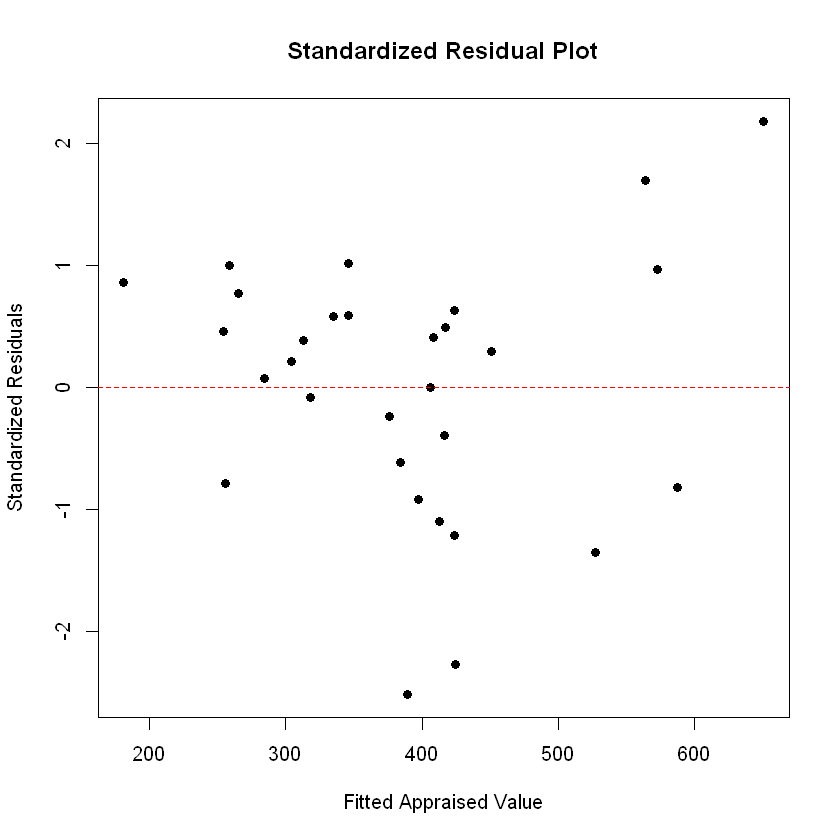

In [21]:
linefit3 <- lm(AppraisedValue ~ HouseSize + LotSize + Age)
linefit3.stres <- rstandard(linefit3)
plot(linefit3$fitted.values, linefit3.stres, pch = 16 ,  main = "Standardized Residual Plot",  
     xlab = "Fitted Appraised Value",  ylab = "Standardized Residuals")
abline(0,0,  lty=2,  col="red")

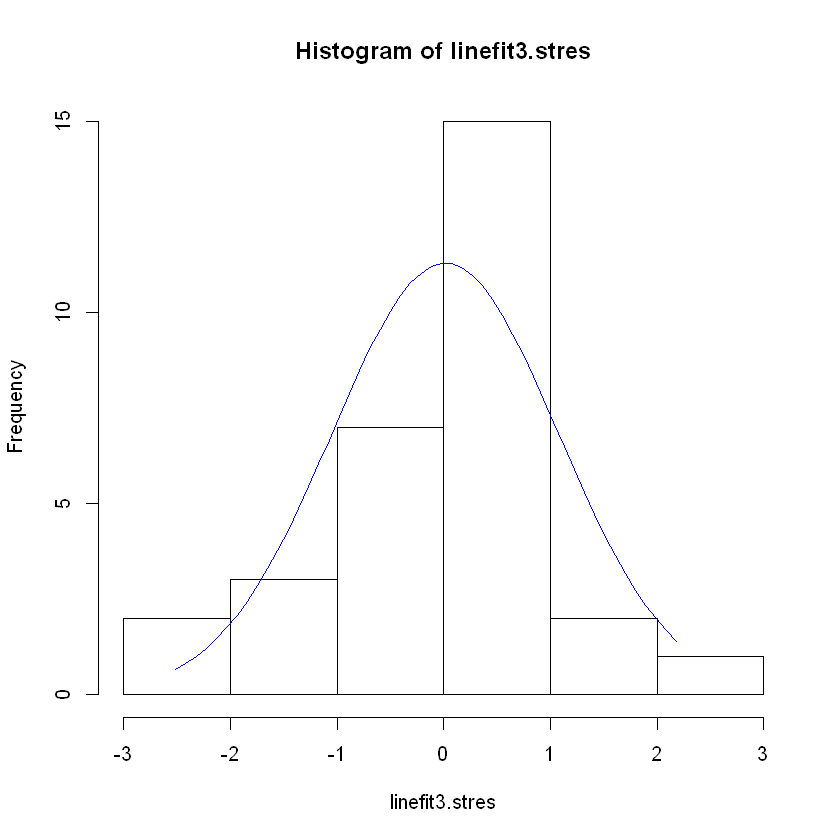

In [22]:
h <- hist(linefit3.stres)
x <- linefit3.stres
xfit <- seq(min(x), max(x), length = 50 )
yfit <- dnorm(xfit, mean =mean(x), sd =sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue")

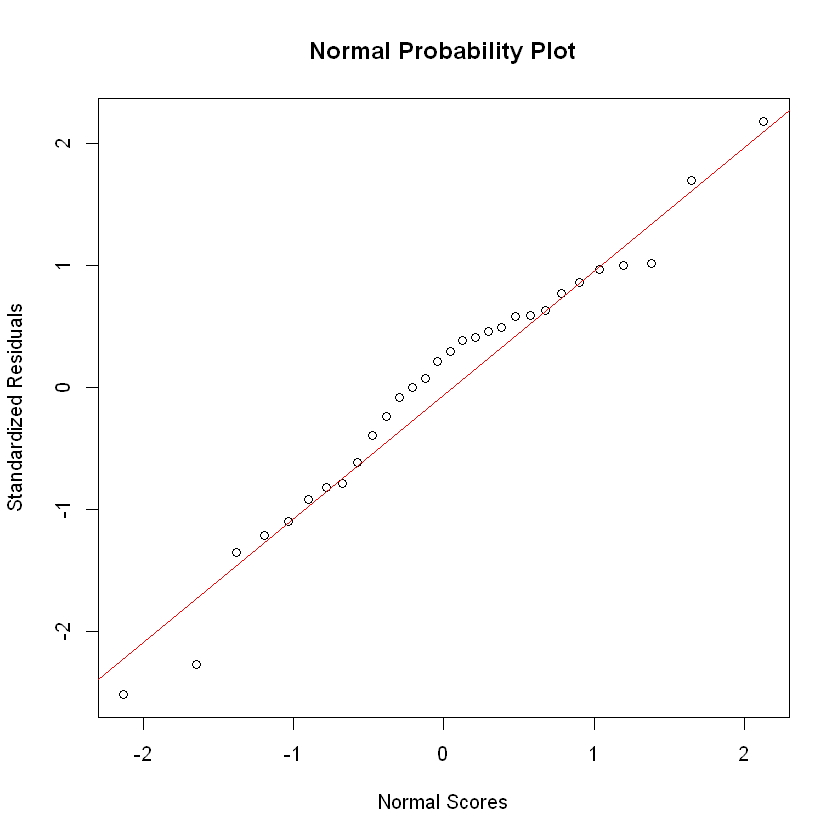

In [23]:
qqnorm(linefit3.stres, main = "Normal Probability Plot",  xlab = "Normal Scores",  ylab = "Standardized Residuals")
qqline(linefit3.stres, col = "red")

In [101]:
shapiro.test(linefit3.stres)


	Shapiro-Wilk normality test

data:  linefit3.stres
W = 0.96723, p-value = 0.4665


In [ ]:
# R 7.2 Detergent

In [24]:
library(readxl)
fresh <- read_excel("Fresh.xlsx", na = "NA", col_names = TRUE)

attach(fresh)

In [25]:
head(fresh)

Price,IndPrice,AdvExp,PriceDif,Demand
3.85,3.80,5.50,-0.05,7.38
3.75,4.00,6.75,0.25,8.51
3.70,4.30,7.25,0.60,9.52
3.70,3.70,5.50,0.00,7.50
3.60,3.85,7.00,0.25,9.33
3.60,3.80,6.50,0.20,8.28


In [46]:
linefitfresh <- lm(Demand ~ Price + IndPrice + AdvExp)

In [47]:
summary(linefitfresh)


Call:
lm(formula = Demand ~ Price + IndPrice + AdvExp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41065 -0.11562 -0.00984  0.13466  0.51361 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5891     2.4450   3.104 0.004567 ** 
Price        -2.3577     0.6379  -3.696 0.001028 ** 
IndPrice      1.6122     0.2954   5.459 1.01e-05 ***
AdvExp        0.5012     0.1259   3.981 0.000491 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2347 on 26 degrees of freedom
Multiple R-squared:  0.8936,	Adjusted R-squared:  0.8813 
F-statistic:  72.8 on 3 and 26 DF,  p-value: 8.883e-13


In [48]:
linefitfresh2 <- lm(Demand ~ Price + IndPrice)
summary(linefitfresh2)


Call:
lm(formula = Demand ~ Price + IndPrice)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.54823 -0.19811  0.00107  0.18421  0.64891 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.6082     2.3924   5.688 4.83e-06 ***
Price        -4.0086     0.6036  -6.641 3.98e-07 ***
IndPrice      2.4686     0.2520   9.796 2.21e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2922 on 27 degrees of freedom
Multiple R-squared:  0.8288,	Adjusted R-squared:  0.8161 
F-statistic: 65.33 on 2 and 27 DF,  p-value: 4.507e-11


In [49]:
linefitfresh2 <- lm(Demand ~ Price)
summary(linefitfresh2)


Call:
lm(formula = Demand ~ Price)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05949 -0.50562 -0.04312  0.52938  1.01325 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.624      4.711   4.590  8.5e-05 ***
Price         -3.545      1.261  -2.812   0.0089 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6122 on 28 degrees of freedom
Multiple R-squared:  0.2202,	Adjusted R-squared:  0.1923 
F-statistic: 7.905 on 1 and 28 DF,  p-value: 0.008902


In [ ]:
# a) Demand = B0 + B1(Price) + B2(IndPrice) + B3(AdExp) + E

# b.

# c. 
# For each additional $1 that the average industry price goes up, the demand of bottles goes up by 1.6122 * 100 (160 bottles)
# Price        -2.3577
# For each additional $1 increase in our price, the demand goes down an average of 2.3577 * 100 (235 bottles)
# Price        -2.3577
# B0 is meaningless, this would be the demand for something that is free which is not happening

# H0: B3 = 0; no relationship between adv/sales holding price, industry price fixed
# Ha: B3 =/= 0
# make sure to mention in the conclusion, #### holding all other variables CONSTANT ###

In [52]:
cor(fresh[,1:3])

,Price,IndPrice,AdvExp
Price,1.00000000,0.07836681,-0.468793
IndPrice,0.07836681,1.00000000,0.604540
AdvExp,-0.46879301,0.60454000,1.000000


In [28]:
cor(fresh[,5:1])

,Demand,PriceDif,AdvExp,IndPrice,Price
Demand,1.0000000,0.8896718,0.8759536,0.74094817,-0.46922030
PriceDif,0.8896718,1.0000000,0.7599640,0.91856618,-0.32206650
AdvExp,0.8759536,0.7599640,1.0000000,0.60454000,-0.46879301
IndPrice,0.7409482,0.9185662,0.6045400,1.00000000,0.07836681
Price,-0.4692203,-0.3220665,-0.4687930,0.07836681,1.00000000


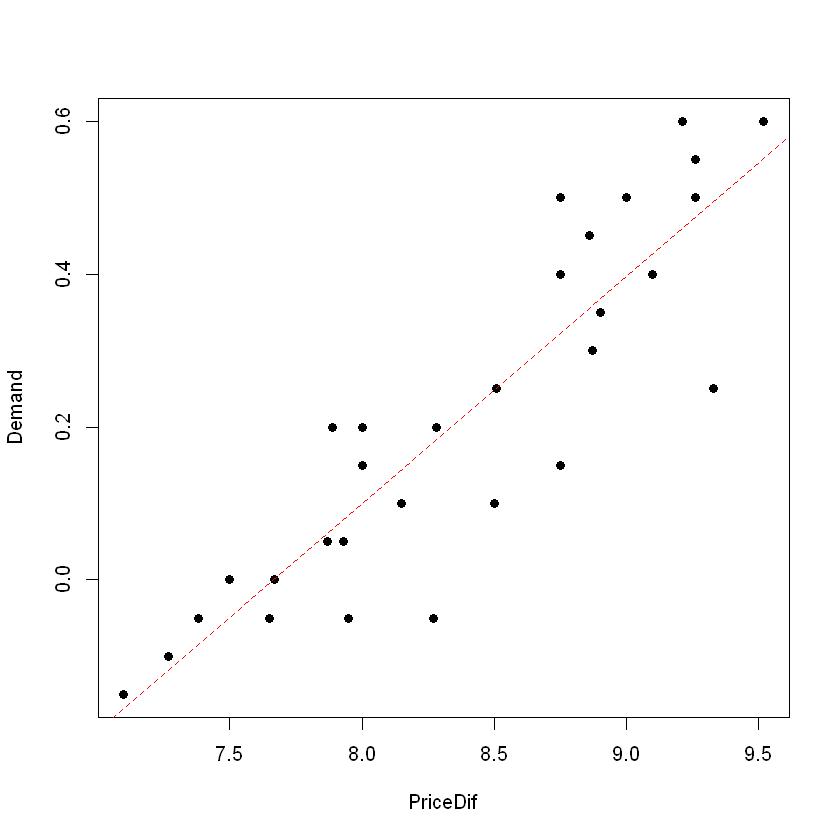

In [30]:
plot(Demand, PriceDif, pch = 16 ,  xlab = "PriceDif",  ylab = "Demand")
abline(lm(PriceDif ~ Demand), lty=2,  col= 'red')

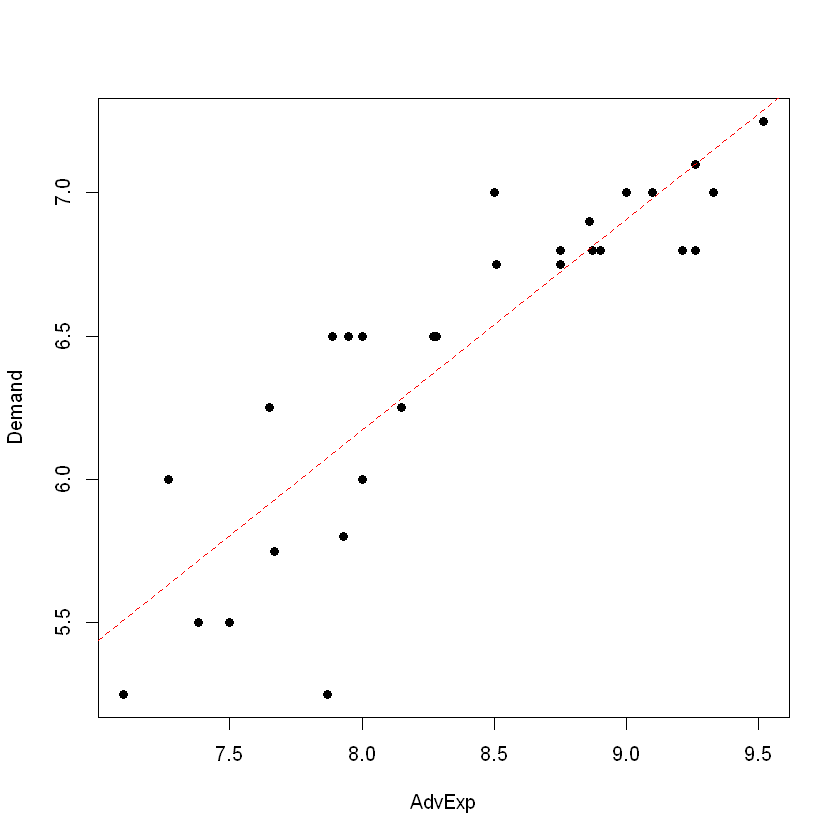

In [31]:
plot(Demand, AdvExp, pch = 16 ,  xlab = "AdvExp",  ylab = "Demand")
abline(lm(AdvExp ~ Demand), lty=2,  col= 'red')

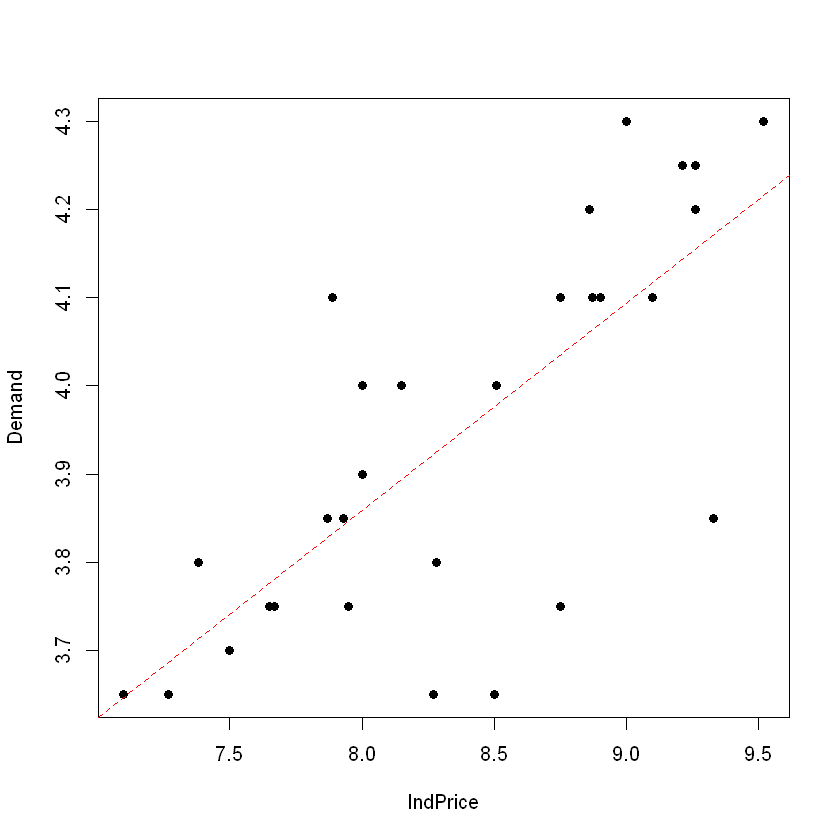

In [32]:
plot(Demand, IndPrice, pch = 16 ,  xlab = "IndPrice",  ylab = "Demand")
abline(lm(IndPrice ~ Demand), lty=2,  col= 'red')

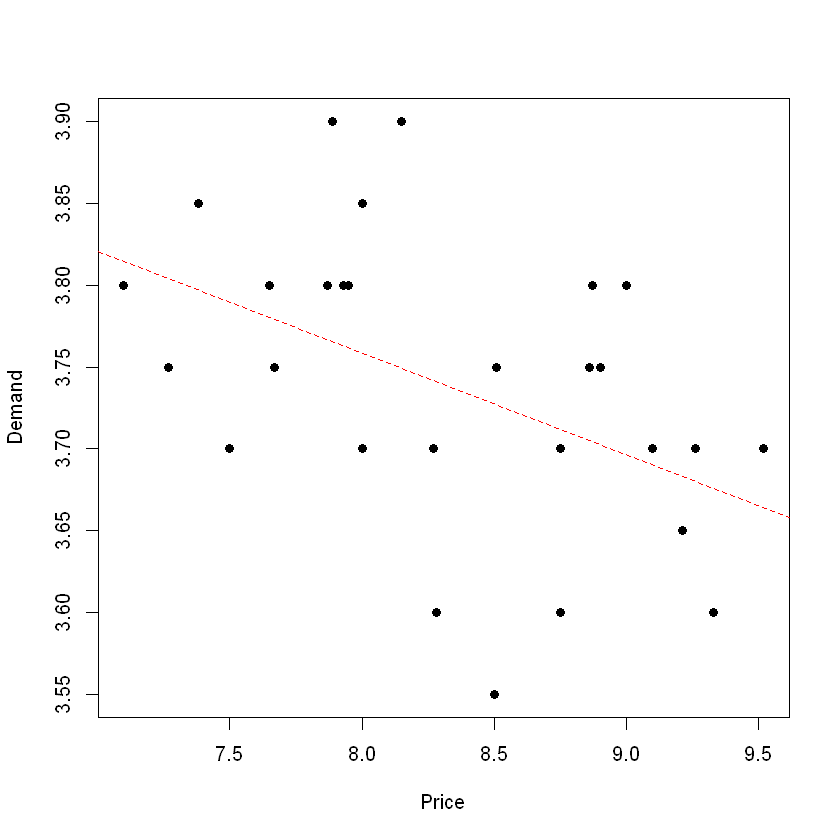

In [33]:
plot(Demand, Price, pch = 16 ,  xlab = "Price",  ylab = "Demand")
abline(lm(Price ~ Demand), lty=2,  col= 'red')

In [64]:
linefit2 <- lm(Demand ~ AdvExp + PriceDif)
summary(linefit2)


Call:
lm(formula = Demand ~ AdvExp + PriceDif)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49779 -0.12031 -0.00867  0.11084  0.58106 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4075     0.7223   6.102 1.62e-06 ***
AdvExp        0.5635     0.1191   4.733 6.25e-05 ***
PriceDif      1.5883     0.2994   5.304 1.35e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2383 on 27 degrees of freedom
Multiple R-squared:  0.886,	Adjusted R-squared:  0.8776 
F-statistic:   105 on 2 and 27 DF,  p-value: 1.845e-13


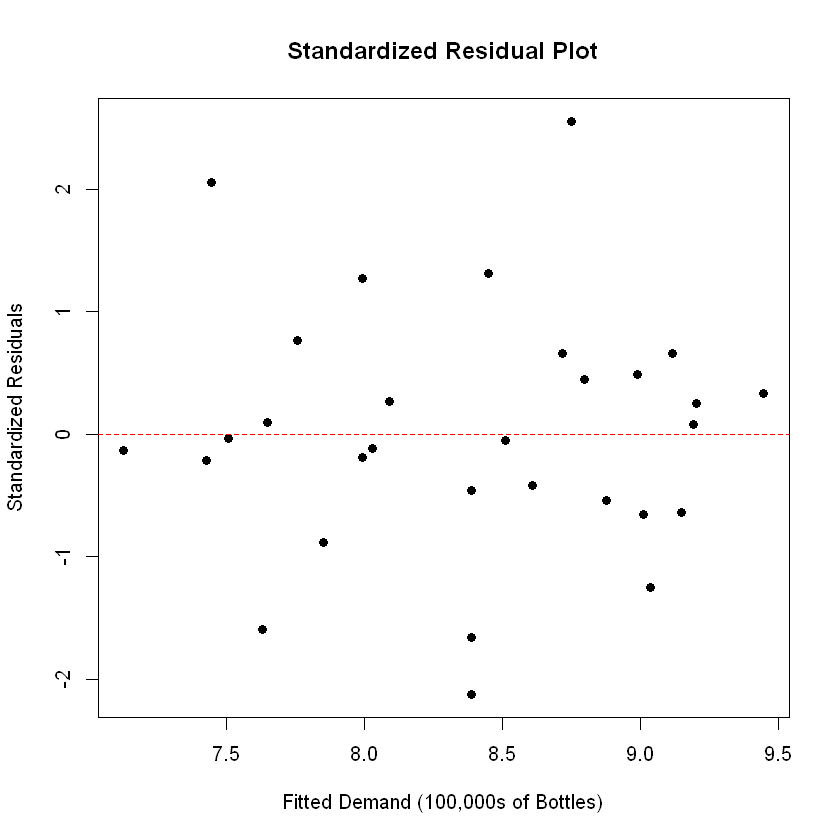

In [65]:

linefit2.stres <- rstandard(linefit2)
plot(linefit2$fitted.values, linefit2.stres, pch = 16 ,  main = "Standardized Residual Plot",  
     xlab = "Fitted Demand (100,000s of Bottles)",  ylab = "Standardized Residuals")
abline(0,0,  lty=2,  col="red")

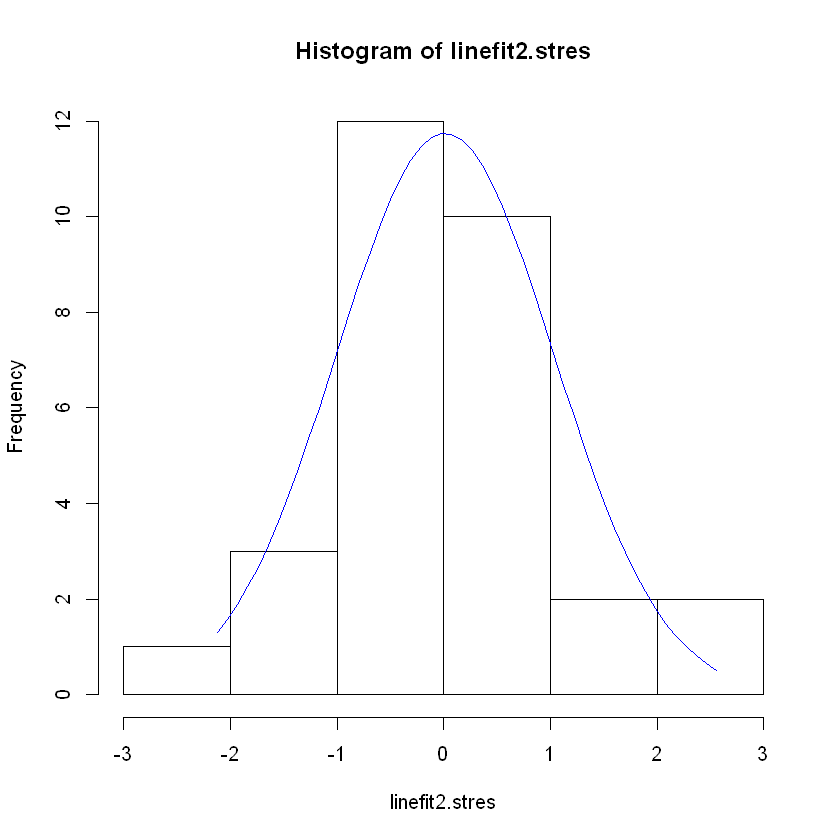

In [66]:
h <- hist(linefit2.stres)
x <- linefit2.stres
xfit <- seq(min(x), max(x), length = 50 )
yfit <- dnorm(xfit, mean =mean(x), sd =sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue")

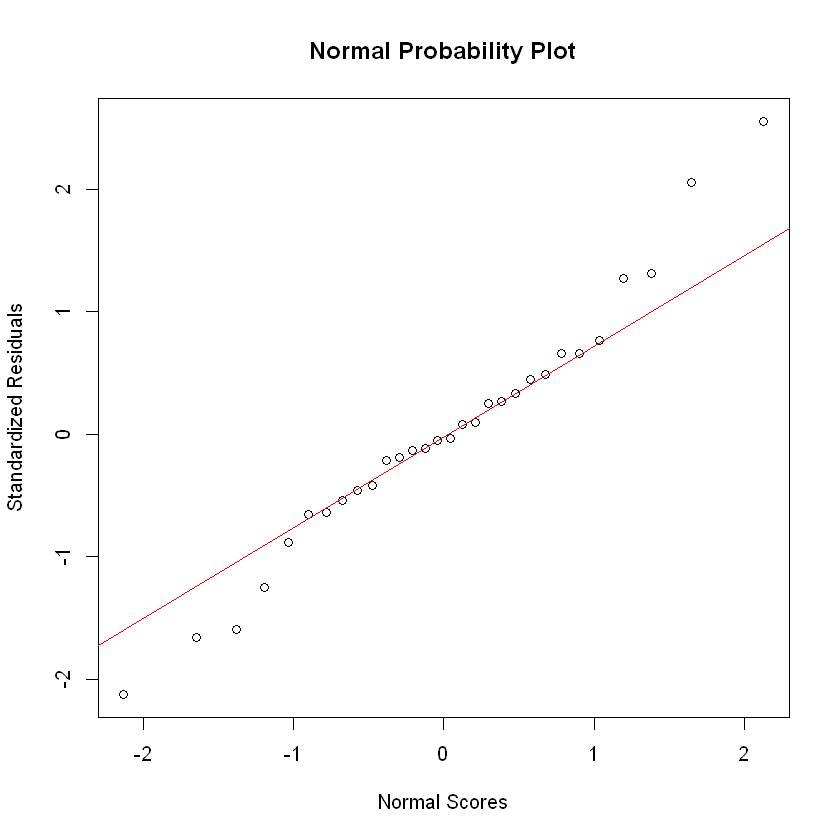

In [67]:
qqnorm(linefit2.stres, main = "Normal Probability Plot",  xlab = "Normal Scores",  ylab = "Standardized Residuals")
qqline(linefit2.stres, col = "red")

In [68]:
shapiro.test(linefit2.stres)


	Shapiro-Wilk normality test

data:  linefit2.stres
W = 0.97474, p-value = 0.675


In [ ]:
# maximize R2
# minimize S - remove variance in the model
# good residuals - they don't violate residuals assumptions
# logical relationships

In [63]:
linefit2 <- lm(Demand ~ AdvExp + PriceDif)
summary(linefit2)


Call:
lm(formula = Demand ~ AdvExp + PriceDif)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49779 -0.12031 -0.00867  0.11084  0.58106 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4075     0.7223   6.102 1.62e-06 ***
AdvExp        0.5635     0.1191   4.733 6.25e-05 ***
PriceDif      1.5883     0.2994   5.304 1.35e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2383 on 27 degrees of freedom
Multiple R-squared:  0.886,	Adjusted R-squared:  0.8776 
F-statistic:   105 on 2 and 27 DF,  p-value: 1.845e-13


In [ ]:
# Demand = B0 + B1(Price) + B2(IndPrice) + B3(AdExp) + e
# force B1 = -B2 or the Price to negatively industry price

# Demand = B0 + B1(IndPrice - Price) + B2 (AdExp) + e

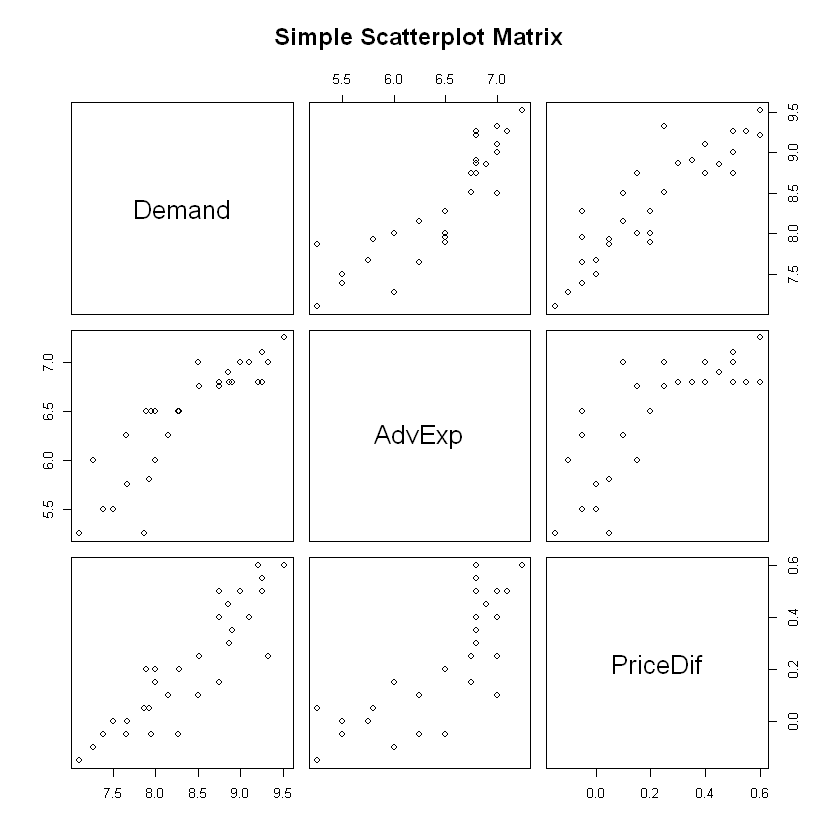

In [59]:
pairs(~  Demand + AdvExp + PriceDif, main="Simple Scatterplot Matrix")